<a href="https://colab.research.google.com/github/EisaacJC/ToLearn/blob/master/colmeme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IA para Análisis de Datos Económicos: Aplicación de machine learning, procesamiento de lenguaje natural y redes neuronales en el análisis económico


## M.I.A. Emmanuel Isaac Juárez Caballero.

##Requisitos(Google Colaboratory):
    - Computadora/Tablet/Celular con conectividad a internet.
    - Cuenta de gmail

## Agenda de temas a tratar:

* Introducción a Python.
* Descargar series de tiempo financieras con ayuda de Yahoo Finance.
* Conceptos básicos a estudiar en series de tiempo.
* Redes Neuronales.
* Redes Neuronales Recurrentes.
* Análisis de sentimientos.
* Metaheurísticas usadas en trading.
* Modelo de ponderación.
* Analogías físicas:
    - El caso del caminante aleatorio.
    - Distribuciones de probabilidad.
* Retornos y retornos logarítmicos.
* Procesado de series de tiempo.
* Modelos de predicción.
    - Machine Learning
    - Métodos estadísticos.

## Instalación de algunas librerías externas

In [1]:
!pip install newsapi-python

In [2]:
%pip install tqdm

# Como hacer retrieve de noticias reales

* Es algo costoso, así que nosotros jugaremos con sentimientos aleatorios (por simplicidad, pero evidentemente esto hará nuestro modelo escencialmente malo)

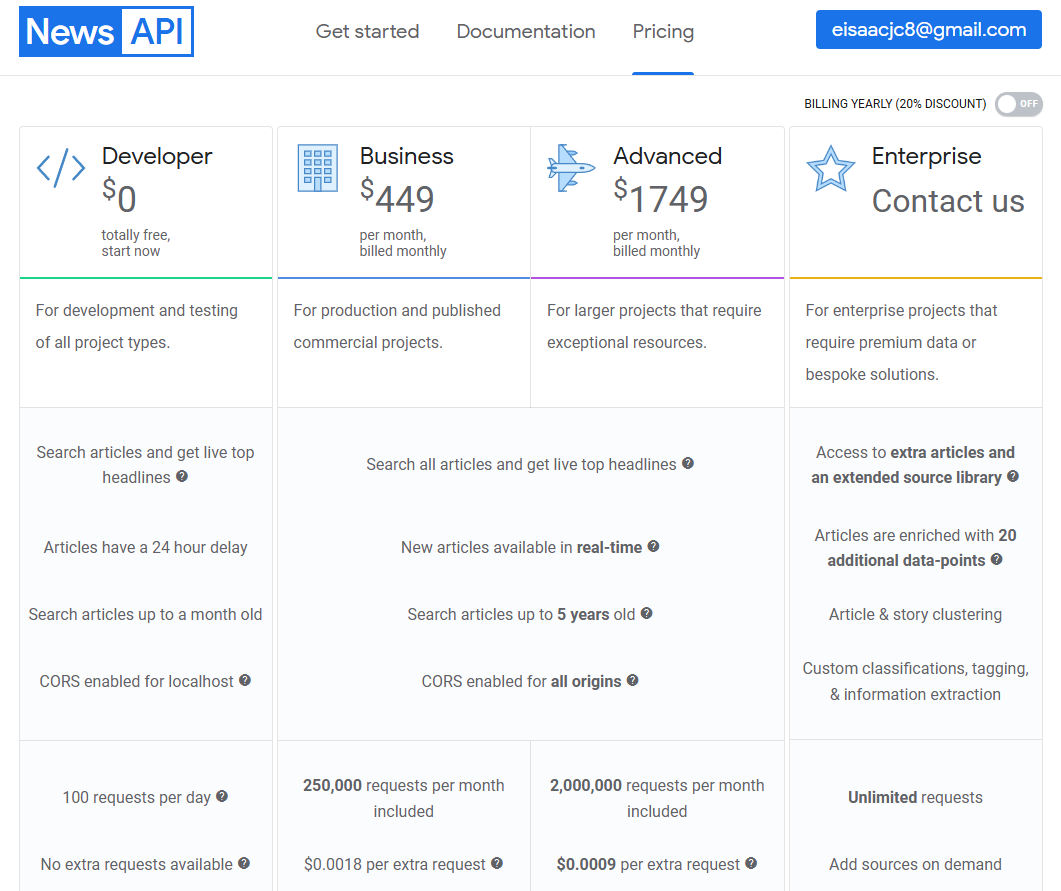

In [ ]:
from newsapi import NewsApiClient
from textblob import TextBlob
newsapi = NewsApiClient(api_key='c463ffa3dba34e13a03f34983ffb2af0')
def get_recent_news(ticker, from_date, to_date, num_articles=5):
    all_articles = newsapi.get_everything(q=ticker,
                                          from_param=from_date,
                                          to=to_date,
                                          language='en',
                                          sort_by='relevancy',
                                          page_size=num_articles)

    news_list = []
    for article in all_articles['articles']:
        title = article['title']
        description = article['description'] or ""
        content = article['content'] or ""
        combined_text = title + description + content
        sentiment = TextBlob(combined_text).sentiment.polarity

        news_list.append({
            'date': article['publishedAt'],
            'title': title,
            'description': description,
            'sentiment_score': sentiment
        })
    return news_list
from datetime import datetime, timedelta
ticker = "AAPL"
today = datetime.today()
last_week = today - timedelta(days=7)
recent_news = get_recent_news(ticker, last_week.strftime('%Y-%m-%d'), today.strftime('%Y-%m-%d'), num_articles=5)
for news in recent_news:
    print(news)


{'date': '2024-09-21T14:30:10Z', 'title': 'The iPhone 16 is on shelves, but what is consumer demand indicating?', 'description': 'The iPhone 16 went on sale Friday, the latest generation of Apple (AAPL) devices already flying over shelves and into consumer hands this morning. BofA...', 'sentiment_score': 0.5}
{'date': '2024-09-20T12:15:00Z', 'title': "Apple's iPhone 16 is in stores now — but it's missing a key selling point", 'description': 'Apple’s (AAPL) latest lineup of iPhones hit stores on Friday, but it’s notably missing one of its key selling points that the tech giant is hoping will convince users to upgrade their older models.Read more...', 'sentiment_score': 0.051515151515151514}
{'date': '2024-09-23T12:55:00Z', 'title': 'Sam Altman and former Apple executives are making an AI device', 'description': 'OpenAI chief executive Sam Altman is teaming up with former Apple (AAPL) design executive Jony Ive and Laurene Powell Jobs, widow of Apple founder Steve Jobs, to start a new art

# Otra opción gratuita, ¿y si hacemos web scrapping?

* Consideremos limitaciones de consulta
* Buena alternativa dado que la API de Twitter ya no soporta consultas como antes
* La API de reddit es otra possibilidad (esto funciona curiosamente bien para el trading y criptomonedas)

In [ ]:
!pip install requests beautifulsoup4 textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import pandas as pd
def scrape_duckduckgo_news(query, num_articles=10):
    url = f'https://duckduckgo.com/html?q={query}+news'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    headlines = []
    for item in soup.find_all('a', class_='result__a', limit=num_articles):
        headlines.append(item.get_text())
    return headlines
query = "MSFT stock news"
news_headlines = scrape_duckduckgo_news(query, num_articles=5)
news_headlines

['Microsoft Corporation (MSFT) Latest Stock News & Headlines - Yahoo Finance',
 'Microsoft Corporation (MSFT;) Latest Stock News & Headlines - Yahoo Finance',
 'Microsoft Corporation (MSFT): Why Are Billionaires Bullish on This ...',
 'Microsoft Plans New $60 Billion Buyback, Raises Dividend 10%',
 'Microsoft Corp (MSFT) Stock Price & News - Google Finance']

In [ ]:
def analyze_sentiment(headlines):
    sentiments = []
    for headline in headlines:
        sentiment = TextBlob(headline).sentiment.polarity
        sentiments.append({'headline': headline, 'sentiment': sentiment})
    return pd.DataFrame(sentiments)
sentiment_results = analyze_sentiment(news_headlines)
print(sentiment_results)

                                            headline  sentiment
0  Microsoft Corporation (MSFT) Latest Stock News...   0.500000
1  Microsoft Corporation (MSFT;) Latest Stock New...   0.375000
2  Microsoft Corporation (MSFT): Why Are Billiona...   0.000000
3  Microsoft Plans New $60 Billion Buyback, Raise...   0.136364
4  Microsoft Corp (MSFT) Stock Price & News - Goo...   0.000000


In [ ]:
headline="Terrible news for the current market"
sentiment = TextBlob(headline).sentiment.polarity
print(f"headline: {headline}, sentiment: {sentiment}")

headline: Terrible news for the current market, sentiment: -0.5


In [ ]:
def sentiment_based_strategy(sentiment_data):
    avg_sentiment = sentiment_data['sentiment'].mean()
    if avg_sentiment > 0:
        action = "Buy"
    elif avg_sentiment < 0:
        action = "Sell"
    else:
        action = "Hold"
    return avg_sentiment, action
avg_sentiment, action = sentiment_based_strategy(sentiment_results)
print(f"Average Sentiment: {avg_sentiment:.2f}, Suggested Action: {action}")

Average Sentiment: 0.20, Suggested Action: Buy



## 1. Modelo LSTM para Predicción de Series Temporales Financieras

### 1.1 Preprocesamiento de Datos

**Normalización Min-Max:**
Para una serie temporal financiera $X = \{x_1, x_2, ..., x_n\}$, la normalización se define como:

$$x_{norm} = \frac{x - \min(X)}{\max(X) - \min(X)}$$

### 1.2 Arquitectura LSTM

La unidad LSTM se define por las siguientes ecuaciones:

$$
\begin{align}
f_t &= \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) \\
i_t &= \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) \\
\tilde{C}_t &= \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) \\
C_t &= f_t * C_{t-1} + i_t * \tilde{C}_t \\
o_t &= \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) \\
h_t &= o_t * \tanh(C_t)
\end{align}
$$

Donde:
- $f_t$: puerta de olvido
- $i_t$: puerta de entrada
- $\tilde{C}_t$: candidato a celda de estado
- $C_t$: celda de estado
- $o_t$: puerta de salida
- $h_t$: estado oculto
- $\sigma$: función sigmoide
- $W$ y $b$: matrices de peso y vectores de sesgo

### 1.3 Función de Pérdida

Error Cuadrático Medio (MSE):

$$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

Donde $y_i$ son los valores reales y $\hat{y}_i$ son las predicciones.

### 1.4 Optimización

El optimizador Adam actualiza los pesos $\theta$ en cada iteración $t$ según:

$$
\begin{align}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
\hat{m}_t &= \frac{m_t}{1 - \beta_1^t} \\
\hat{v}_t &= \frac{v_t}{1 - \beta_2^t} \\
\theta_t &= \theta_{t-1} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
\end{align}
$$

Donde $g_t$ es el gradiente en el tiempo $t$, y $\eta$ es la tasa de aprendizaje.

### 1.5 Estrategia de Trading

La posición en el mercado se determina por:

$$Position_t = \begin{cases}
1 & \text{si } \hat{P}_{t+1} > P_t \\
-1 & \text{en otro caso}
\end{cases}$$

Donde $\hat{P}_{t+1}$ es el precio predicho y $P_t$ es el precio actual.

Los retornos de la estrategia se calculan como:

$$R_t^{strategy} = Position_{t-1} \cdot (P_t - P_{t-1}) / P_{t-1}$$

### 1.6 Métricas de Rendimiento

**Retorno Total:**
$$R_{total} = \prod_{t=1}^T (1 + R_t^{strategy}) - 1$$

**Ratio de Sharpe:**
$$SharpeRatio = \frac{E[R^{strategy}]}{\sigma[R^{strategy}]} \cdot \sqrt{252}$$

**Máximo Drawdown:**
$$MDD = \min_{t \in (0,T)} \left(\frac{V_t}{\max_{s \in (0,t)} V_s} - 1\right)$$

Donde $V_t$ es el valor del portafolio en el tiempo $t$.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob

In [ ]:
def get_market_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [ ]:
def create_features(data):
    data['Returns'] = data['Close'].pct_change()
    data['Volatility'] = data['Returns'].rolling(window=20).std()
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_30'] = data['Close'].rolling(window=30).mean()
    data['RSI'] = calculate_rsi(data['Close'])
    data.dropna(inplace=True)
    return data

In [ ]:
def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

In [ ]:
def prepare_data_for_lstm(data, lookback=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close', 'Returns', 'Volatility', 'MA_10', 'MA_30', 'RSI']])

    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i])
        y.append(scaled_data[i, 0])

    return np.array(X), np.array(y), scaler

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(input_shape[1], input_shape[2])),
        Dropout(0.2),
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [ ]:
def lstm_trading_strategy(model, data, scaler, lookback=60):
    scaled_data = scaler.transform(data[['Close', 'Returns', 'Volatility', 'MA_10', 'MA_30', 'RSI']])

    predictions = []
    for i in range(lookback, len(scaled_data)):
        X = scaled_data[i-lookback:i].reshape(1, lookback, 6)
        prediction = model.predict(X, verbose=0)
        predictions.append(prediction[0, 0])

    predictions = np.array(predictions).reshape(-1, 1)
    dummy = np.zeros((len(predictions), 6))
    dummy[:, 0] = predictions[:, 0]
    predictions = scaler.inverse_transform(dummy)[:, 0]

    results = data.iloc[lookback:].copy()
    results['Predicted_Close'] = predictions
    results['Position'] = np.where(results['Predicted_Close'] > results['Close'], 1, -1)
    results['Strategy_Returns'] = results['Position'].shift(1) * results['Returns']

    return results

In [ ]:
def scrape_duckduckgo_news(query, num_articles=10):
    url = f'https://duckduckgo.com/html?q={query}+news'

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    headlines = []
    for item in soup.find_all('a', class_='result__a', limit=num_articles):
        headlines.append(item.get_text())

    return headlines

In [ ]:
def analyze_sentiment(headlines):
    sentiments = []
    for headline in headlines:
        sentiment = TextBlob(headline).sentiment.polarity
        sentiments.append({'headline': headline, 'sentiment': sentiment})

    return pd.DataFrame(sentiments)

In [ ]:
def sentiment_based_strategy(sentiment_data):
    avg_sentiment = sentiment_data['sentiment'].mean()

    if avg_sentiment > 0.1:
        action = "Buy"
    elif avg_sentiment < -0.1:
        action = "Sell"
    else:
        action = "Hold"

    return avg_sentiment, action

In [ ]:
def optimize_portfolio(all_results, sentiment_actions):
    portfolio = {}
    for ticker, action in sentiment_actions.items():
        if action == "Buy":
            weight = 0.2
        elif action == "Sell":
            weight = 0.05
        else:
            weight = 0.1
        portfolio[ticker] = weight
    total_weight = sum(portfolio.values())
    portfolio = {ticker: weight / total_weight for ticker, weight in portfolio.items()}
    portfolio_returns = pd.DataFrame()
    for ticker, weight in portfolio.items():
        portfolio_returns[ticker] = all_results[ticker]['Strategy_Returns'] * weight
    return portfolio_returns.sum(axis=1), portfolio

In [ ]:
def plot_results(portfolio_returns):
    plt.figure(figsize=(15, 10))
    cumulative_returns = (1 + portfolio_returns).cumprod()
    plt.plot(cumulative_returns.index, cumulative_returns)
    plt.title("Cumulative Returns of Sentiment-Based LSTM Trading Strategy Portfolio")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.show()

In [ ]:
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "META"]
start_date = "2022-01-01"
end_date = "2023-12-31"
all_results = {}
sentiment_actions = {}

[*********************100%***********************]  1 of 1 completed

Processing AAPL...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed

AAPL - Average Sentiment: 0.15, Suggested Action: Buy
Processing GOOGL...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed

GOOGL - Average Sentiment: 0.26, Suggested Action: Buy
Processing MSFT...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed

MSFT - Average Sentiment: 0.17, Suggested Action: Buy
Processing AMZN...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed

AMZN - Average Sentiment: 0.04, Suggested Action: Hold
Processing META...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


META - Average Sentiment: 0.17, Suggested Action: Buy


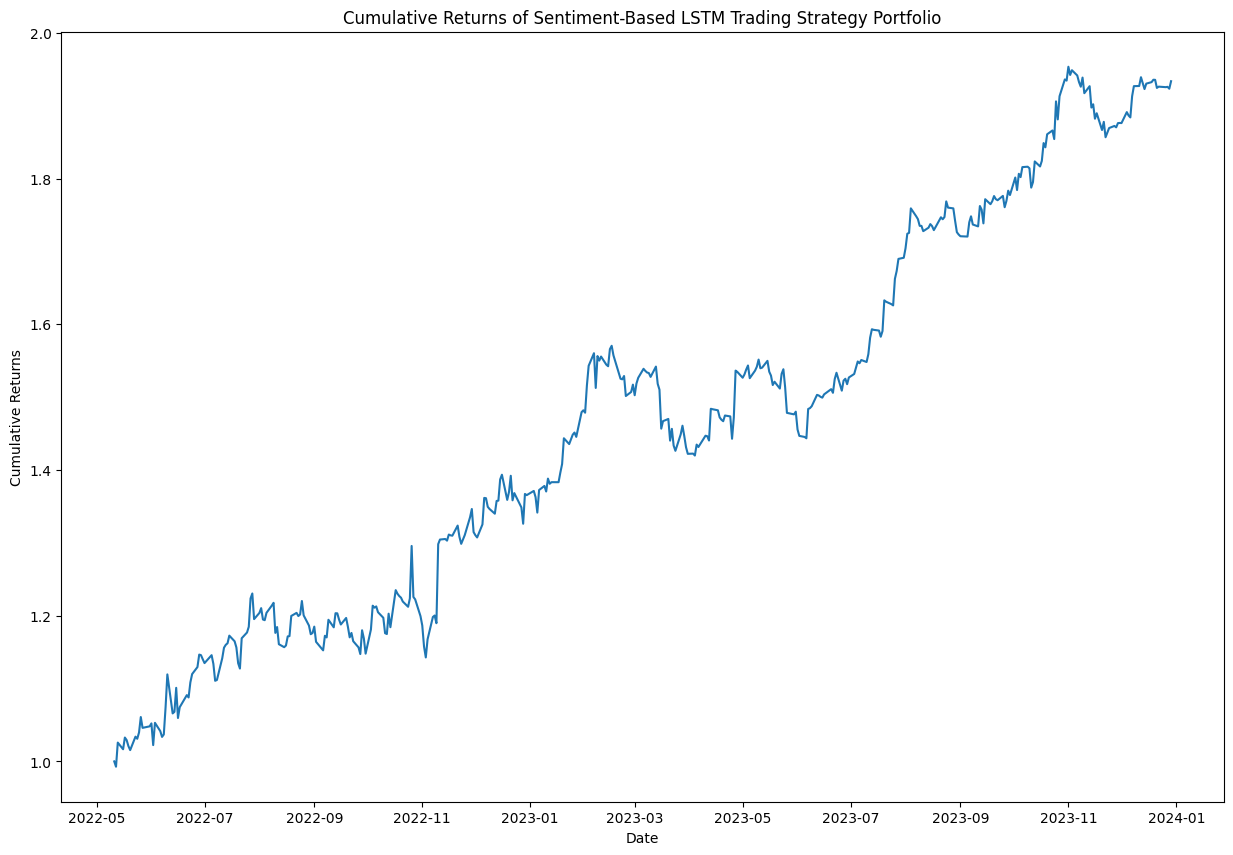


Portfolio Performance:
Total Return: 93.37%
Sharpe Ratio: 1.95
Max Drawdown: -11.81%

Portfolio Weights:
AAPL: 22.22%
GOOGL: 22.22%
MSFT: 22.22%
AMZN: 11.11%
META: 22.22%


In [ ]:
for ticker in tickers:
    print(f"Processing {ticker}...")
    data = get_market_data(ticker, start_date, end_date)
    data = create_features(data)
    X, y, scaler = prepare_data_for_lstm(data)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    model = build_lstm_model(X.shape)
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
    results = lstm_trading_strategy(model, data, scaler)
    all_results[ticker] = results
    query = f"{ticker} stock news"
    news_headlines = scrape_duckduckgo_news(query, num_articles=5)
    sentiment_results = analyze_sentiment(news_headlines)
    avg_sentiment, action = sentiment_based_strategy(sentiment_results)
    sentiment_actions[ticker] = action
    print(f"{ticker} - Average Sentiment: {avg_sentiment:.2f}, Suggested Action: {action}")

portfolio_returns, portfolio_weights = optimize_portfolio(all_results, sentiment_actions)
plot_results(portfolio_returns)
cumulative_returns = (1 + portfolio_returns).cumprod()
total_return = cumulative_returns.iloc[-1] - 1
sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

print("\nPortfolio Performance:")
print(f"Total Return: {total_return:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

print("\nPortfolio Weights:")
for ticker, weight in portfolio_weights.items():
    print(f"{ticker}: {weight:.2%}")

[*********************100%***********************]  1 of 1 completed

Processing AAPL...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed

AAPL - Average Sentiment: 0.15, Suggested Action: Buy
Processing GOOGL...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed

GOOGL - Average Sentiment: 0.26, Suggested Action: Buy
Processing MSFT...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed

MSFT - Average Sentiment: 0.13, Suggested Action: Buy
Processing AMZN...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
[*********************100%***********************]  1 of 1 completed

AMZN - Average Sentiment: 0.10, Suggested Action: Hold
Processing META...



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


META - Average Sentiment: 0.17, Suggested Action: Buy


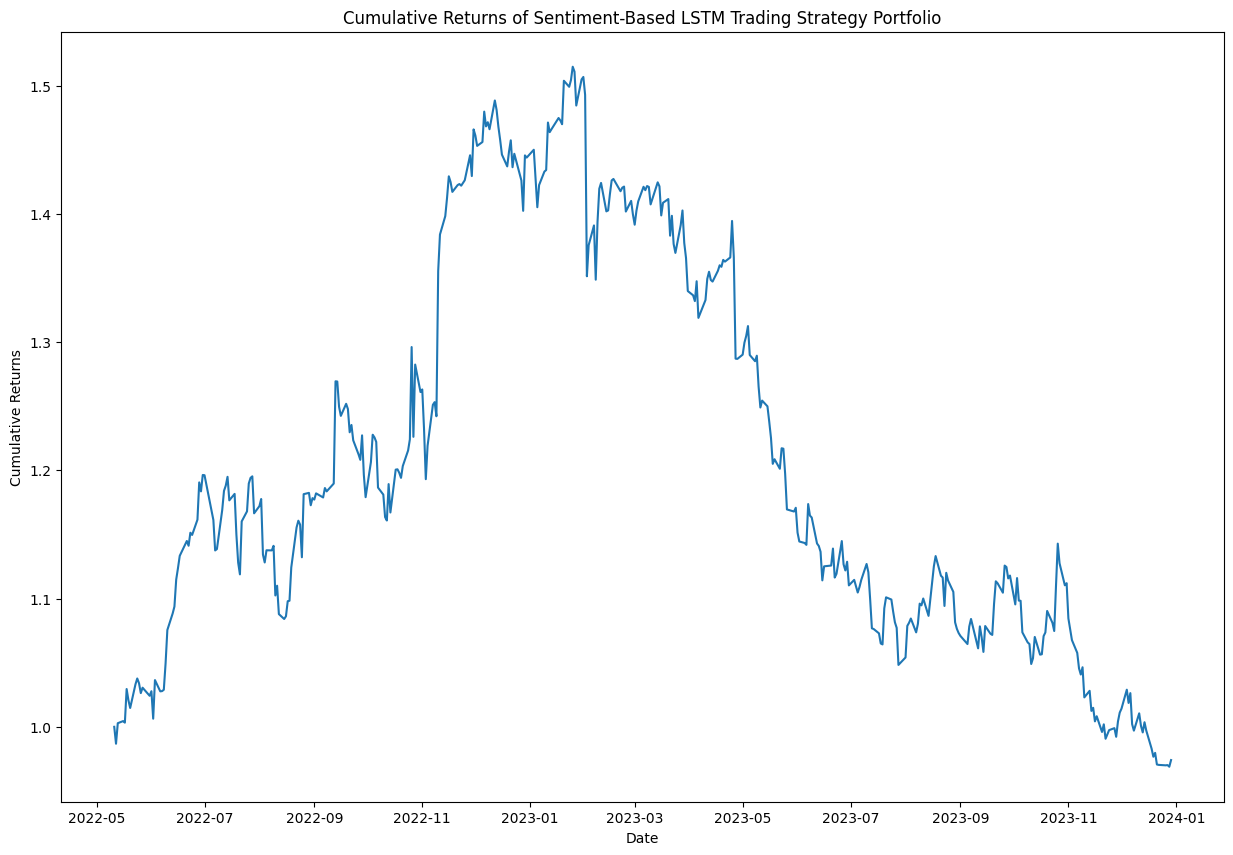

In [ ]:
def lstm_trading_strategy(model, data, scaler, lookback=60):
    scaled_data = scaler.transform(data[['Close', 'Returns', 'Volatility', 'MA_10', 'MA_30', 'RSI']])

    predictions = []
    for i in range(lookback, len(scaled_data)):
        X = scaled_data[i-lookback:i].reshape(1, lookback, 6)
        prediction = model.predict(X, verbose=0)
        predictions.append(prediction[0, 0])
    predictions = np.array(predictions).reshape(-1, 1)
    dummy = np.zeros((len(predictions), 6))
    dummy[:, 0] = predictions[:, 0]
    predictions = scaler.inverse_transform(dummy)[:, 0]
    results = data.iloc[lookback:].copy()
    results['Predicted_Close'] = predictions
    results['LSTM_Signal'] = np.where(results['Predicted_Close'] > results['Close'], 1, -1)
    results['Strategy_Returns'] = results['Returns'] * results['LSTM_Signal'].shift(1)
    return results
for ticker in tickers:
    print(f"Processing {ticker}...")
    data = get_market_data(ticker, start_date, end_date)
    data = create_features(data)
    X, y, scaler = prepare_data_for_lstm(data)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    model = build_lstm_model(X.shape)
    model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, verbose=0)
    results = lstm_trading_strategy(model, data, scaler)
    if 'LSTM_Signal' not in results.columns:
        print(f"Warning: 'LSTM_Signal' not found for {ticker}. Using default signal.")
        results['LSTM_Signal'] = 0
    all_results[ticker] = results
    query = f"{ticker} stock news"
    news_headlines = scrape_duckduckgo_news(query, num_articles=5)
    sentiment_results = analyze_sentiment(news_headlines)
    avg_sentiment, action = sentiment_based_strategy(sentiment_results)
    sentiment_actions[ticker] = action
    print(f"{ticker} - Average Sentiment: {avg_sentiment:.2f}, Suggested Action: {action}")
portfolio_returns, portfolio_weights = optimize_portfolio(all_results, sentiment_actions)
plot_results(portfolio_returns)

KeyError: 'LSTM_Signal'

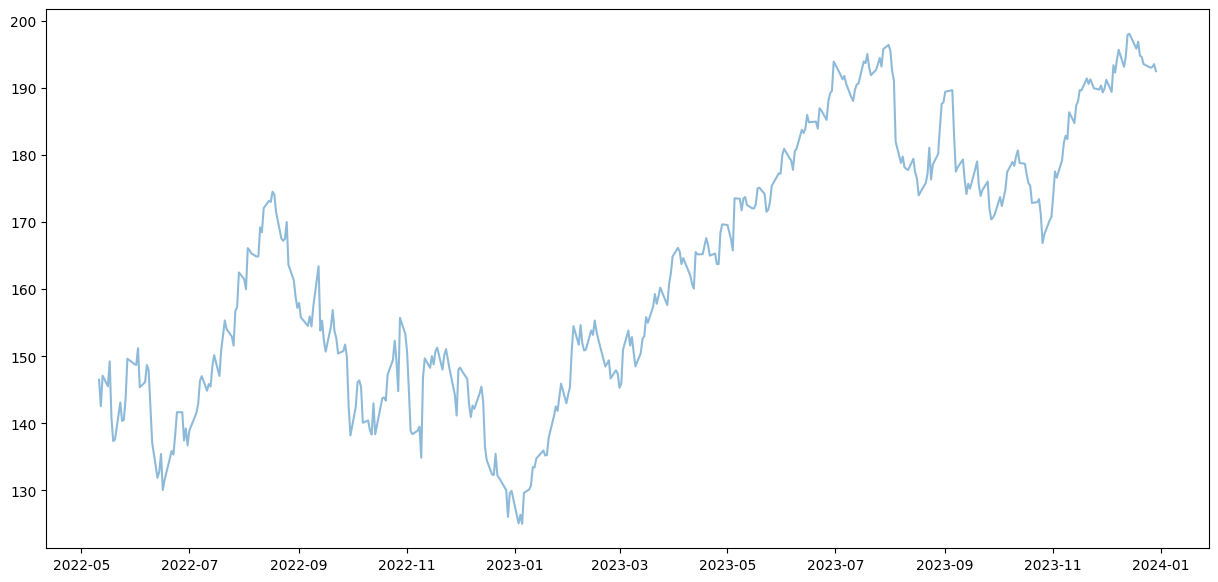

In [ ]:
def plot_buy_sell_signals(ticker, data):
    plt.figure(figsize=(15, 7))
    plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)
    plt.scatter(data[data['LSTM_Signal'] == 1].index, data[data['LSTM_Signal'] == 1]['Close'],
                color='green', label='LSTM Buy', marker='^', alpha=1)
    plt.scatter(data[data['LSTM_Signal'] == -1].index, data[data['LSTM_Signal'] == -1]['Close'],
                color='red', label='LSTM Sell', marker='v', alpha=1)
    plt.scatter(data[data['Sentiment_Signal'] == 1].index, data[data['Sentiment_Signal'] == 1]['Close'],
                color='lightgreen', label='Sentiment Buy', marker='^', alpha=0.7)
    plt.scatter(data[data['Sentiment_Signal'] == -1].index, data[data['Sentiment_Signal'] == -1]['Close'],
                color='lightcoral', label='Sentiment Sell', marker='v', alpha=0.7)
    plt.title(f'{ticker} - Buy/Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def plot_lstm_predictions(ticker, data):
    plt.figure(figsize=(15, 7))
    plt.plot(data.index, data['Close'], label='Actual Close Price')
    plt.plot(data.index, data['Predicted_Close'], label='LSTM Predicted Close Price')
    plt.title(f'{ticker} - LSTM Predictions vs Actual Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def plot_portfolio_evolution(portfolio_returns):
    cumulative_returns = (1 + portfolio_returns).cumprod()
    plt.figure(figsize=(15, 7))
    for method in ['LSTM', 'Sentiment', 'Combined']:
        plt.plot(cumulative_returns.index, cumulative_returns[method], label=f'{method} Strategy')
    plt.title('Portfolio Value Evolution')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.show()
for ticker, results in all_results.items():
    plot_buy_sell_signals(ticker, results)
    plot_lstm_predictions(ticker, results)

plot_portfolio_evolution(pd.DataFrame(portfolio_returns))

# Implementación detallada

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from tqdm import tqdm

def get_market_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def create_features(data):
    data['Returns'] = data['Close'].pct_change()
    data['Volatility'] = data['Returns'].rolling(window=20).std()
    data['MA_10'] = data['Close'].rolling(window=10).mean()
    data['MA_30'] = data['Close'].rolling(window=30).mean()
    data['RSI'] = calculate_rsi(data['Close'])
    data.dropna(inplace=True)
    return data

def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def prepare_data_for_lstm(data, lookback=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close', 'Returns', 'Volatility', 'MA_10', 'MA_30', 'RSI']])

    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i])
        y.append(scaled_data[i, 0])

    return np.array(X), np.array(y), scaler

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=input_shape[1:]),
        Dropout(0.2),
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def lstm_trading_strategy(model, data, scaler, lookback=60):
    scaled_data = scaler.transform(data[['Close', 'Returns', 'Volatility', 'MA_10', 'MA_30', 'RSI']])

    predictions = []
    for i in range(lookback, len(scaled_data)):
        X = scaled_data[i-lookback:i].reshape(1, lookback, 6)
        prediction = model.predict(X, verbose=0)
        predictions.append(prediction[0, 0])

    predictions = np.array(predictions).reshape(-1, 1)
    dummy = np.zeros((len(predictions), 6))
    dummy[:, 0] = predictions[:, 0]
    predictions = scaler.inverse_transform(dummy)[:, 0]

    results = data.iloc[lookback:].copy()
    results['Predicted_Close'] = predictions
    results['LSTM_Signal'] = np.where(results['Predicted_Close'] > results['Close'], 1, -1)
    return results

def scrape_duckduckgo_news(query, num_articles=10):
    url = f'https://duckduckgo.com/html?q={query}+news'

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        headlines = []
        for item in soup.find_all('a', class_='result__a', limit=num_articles):
            headlines.append(item.get_text())

        return headlines
    except Exception as e:
        print(f"Error scraping news: {e}")
        return []

def analyze_sentiment(headlines):
    if not headlines:
        return 0  # Neutral sentiment if no headlines

    sentiments = [TextBlob(headline).sentiment.polarity for headline in headlines]
    return np.mean(sentiments)

def sentiment_based_strategy(avg_sentiment):
    if avg_sentiment > 0.1:
        return 1  # Buy
    elif avg_sentiment < -0.1:
        return -1  # Sell
    else:
        return 0  # Hold

def combined_strategy(lstm_signal, sentiment_signal, w=0.6):
    combined_signal = w * sentiment_signal + (1 - w) * lstm_signal
    return 1 if combined_signal > 0 else -1 if combined_signal < 0 else 0

def optimize_portfolio(all_results, method='combined'):
    portfolio = {}
    for ticker, results in all_results.items():
        if method == 'combined':
            signal = results['Combined_Signal'].iloc[-1]
        elif method == 'sentiment':
            signal = results['Sentiment_Signal'].iloc[-1]
        else:  # LSTM
            signal = results['LSTM_Signal'].iloc[-1]

        if signal == 1:
            weight = 0.2  # Increase weight for buy signal
        elif signal == -1:
            weight = 0.05  # Decrease weight for sell signal
        else:
            weight = 0.1  # Neutral weight for hold

        portfolio[ticker] = weight

    # Normalize weights to sum to 1
    total_weight = sum(portfolio.values())
    portfolio = {ticker: weight / total_weight for ticker, weight in portfolio.items()}

    # Calculate portfolio returns
    portfolio_returns = pd.DataFrame()
    for ticker, weight in portfolio.items():
        portfolio_returns[ticker] = all_results[ticker]['Returns'] * weight

    return portfolio_returns.sum(axis=1), portfolio

def plot_results(all_results, portfolio_returns):
    # Plot cumulative returns for each strategy
    plt.figure(figsize=(15, 10))
    for method in ['LSTM', 'Sentiment', 'Combined']:
        cumulative_returns = (1 + portfolio_returns[method]).cumprod()
        plt.plot(cumulative_returns.index, cumulative_returns, label=f"{method} Strategy")
    plt.title("Cumulative Returns of Trading Strategies")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.show()

    # Plot sentiment trends
    plt.figure(figsize=(15, 10))
    for ticker in all_results.keys():
        plt.plot(all_results[ticker].index, all_results[ticker]['Sentiment'], label=ticker)
    plt.title("Sentiment Trends for All Stocks")
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Plot heatmap of final portfolio weights
    weights = {ticker: results['Combined_Portfolio_Weight'].iloc[-1] for ticker, results in all_results.items()}
    weights_df = pd.DataFrame.from_dict(weights, orient='index', columns=['Weight'])
    plt.figure(figsize=(12, 8))
    sns.heatmap(weights_df, annot=True, cmap='YlGnBu', fmt='.2%')
    plt.title("Final Portfolio Weights Heatmap")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    stocks = [
        'AMZN', 'HD', 'MCD', 'NKE', 'SBUX', 'PG', 'KO', 'WMT', 'PEP', 'COST',
        'XOM', 'CVX', 'COP', 'SLB', 'EOG', 'JPM', 'BAC', 'WFC', 'C', 'GS',
        'JNJ', 'UNH', 'PFE', 'MRK', 'ABBV', 'BA', 'HON', 'UNP', 'CAT', 'GE',
        'AAPL', 'MSFT', 'NVDA', 'GOOGL', 'V', 'LIN', 'FCX', 'APD', 'NEM', 'SHW',
        'T', 'VZ', 'TMUS', 'LUMN', 'CMCSA', 'NEE', 'DUK', 'SO', 'D', 'AEP'
    ]
    start_date = "2024-01-01"
    end_date = "2024-09-25"

    all_results = {}

    for ticker in tqdm(stocks, desc="Processing stocks"):
        print(f"\nProcessing {ticker}...")

        # LSTM model
        data = get_market_data(ticker, start_date, end_date)
        data = create_features(data)
        X, y, scaler = prepare_data_for_lstm(data)
        split = int(0.8 * len(X))
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]
        model = build_lstm_model(X.shape)
        model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
        results = lstm_trading_strategy(model, data, scaler)

        # Sentiment analysis
        sentiment_scores = []
        sentiment_signals = []
        for date in tqdm(results.index, desc="Analyzing sentiment", leave=False):
            query = f"{ticker} stock news on {date.strftime('%Y-%m-%d')}"
            news_headlines = scrape_duckduckgo_news(query, num_articles=5)
            avg_sentiment = analyze_sentiment(news_headlines)
            sentiment_signal = sentiment_based_strategy(avg_sentiment)
            sentiment_scores.append(avg_sentiment)
            sentiment_signals.append(sentiment_signal)

        results['Sentiment'] = sentiment_scores
        results['Sentiment_Signal'] = sentiment_signals

        # Combined strategy
        results['Combined_Signal'] = results.apply(lambda row: combined_strategy(row['LSTM_Signal'], row['Sentiment_Signal']), axis=1)

        all_results[ticker] = results

    # Optimize portfolio for each strategy
    portfolio_returns = {}
    for method in ['LSTM', 'Sentiment', 'Combined']:
        returns, weights = optimize_portfolio(all_results, method=method.lower())
        portfolio_returns[method] = returns

        # Add portfolio weights to results
        for ticker, weight in weights.items():
            all_results[ticker][f'{method}_Portfolio_Weight'] = weight

    # Plot results
    plot_results(all_results, pd.DataFrame(portfolio_returns))

    # Calculate performance metrics for each strategy
    for method in ['LSTM', 'Sentiment', 'Combined']:
        cumulative_returns = (1 + portfolio_returns[method]).cumprod()
        total_return = cumulative_returns.iloc[-1] - 1
        sharpe_ratio = portfolio_returns[method].mean() / portfolio_returns[method].std() * np.sqrt(252)
        max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

        print(f"\n{method} Strategy Performance:")
        print(f"Total Return: {total_return:.2%}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"Max Drawdown: {max_drawdown:.2%}")

    print("\nFinal Portfolio Weights (Combined Strategy):")
    for ticker, results in all_results.items():
        print(f"{ticker}: {results['Combined_Portfolio_Weight'].iloc[-1]:.2%}")

# Un aplicación ligeramente más interesante ....



## 2. Análisis de Estados de Mercado

### 2.1 Mapeo de Potencia de Correlaciones

Para una matriz de correlación $C$, el mapeo de potencia se define como:

$$C_{mapped} = \text{sign}(C) \cdot |C|^{1+\epsilon}$$

Donde $\epsilon$ es un parámetro de ajuste.

### 2.2 Similitud entre Matrices de Correlación

La similitud entre dos matrices de correlación $C_1$ y $C_2$ se calcula como:

$$Similarity(C_1, C_2) = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n |C_{1_{ij}} - C_{2_{ij}}|$$

### 2.3 Escalamiento Multidimensional (MDS)

MDS busca encontrar una configuración de puntos en un espacio de baja dimensión que preserve las distancias entre puntos en el espacio original. Matemáticamente, busca minimizar:

$$\text{Stress} = \sqrt{ \frac{\sum_{i<j} (d_{ij} - \hat{d}_{ij})^2}{\sum_{i<j} d_{ij}^2}}$$

Donde $d_{ij}$ son las distancias originales y $\hat{d}_{ij}$ son las distancias en el espacio de baja dimensión.

### 2.4 Clustering con K-means

K-means busca minimizar la suma de las distancias al cuadrado dentro de cada cluster:

$$J = \sum_{j=1}^k \sum_{i \in S_j} \|x_i - \mu_j\|^2$$

Donde $S_j$ son los puntos en el cluster $j$, y $\mu_j$ es el centroide del cluster $j$.

### 2.5 Probabilidades de Transición

Para $n$ estados de mercado, la matriz de probabilidades de transición $P$ se calcula como:

$$P_{ij} = \frac{ N_{ij} }{ \sum_k N_{ik} }$$

Donde $N_{ij}$ es el número de transiciones observadas del estado $i$ al estado $j$.

### 2.6 Análisis de Sensibilidad

La distancia intracluster promedio se calcula como:

$$D = \frac{1}{k} \sum_{j=1}^k \frac{1}{|S_j|} \sum_{x_i \in S_j} \|x_i - \mu_j\|$$

Donde $k$ es el número de clusters y $S_j$ es el conjunto de puntos en el cluster $j$.

Esta formulación matemática proporciona una base rigurosa para entender los modelos y técnicas utilizados en el análisis de datos económicos con IA. Permite a los participantes del taller comprender los fundamentos teóricos detrás de las implementaciones prácticas y facilita la adaptación y extensión de estos modelos para aplicaciones específicas en economía y finanzas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import yfinance as yf
from datetime import datetime, timedelta
import networkx as nx
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
def download_data(stocks, start_date, end_date):
    data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
    returns = np.log(data) - np.log(data.shift(1))
    return returns.dropna()

In [ ]:
def power_map(C, epsilon):
    return np.sign(C) * np.abs(C) ** (1 + epsilon)

In [ ]:
def compute_similarity(C1, C2):
    return np.mean(np.abs(C1 - C2))

In [ ]:
def compute_correlation_frames(returns, window, shift, epsilon):
    correlation_frames = []
    for i in range(0, len(returns) - window + 1, shift):
        C = returns.iloc[i:i+window].corr()
        C_mapped = power_map(C, epsilon)
        correlation_frames.append(C_mapped)
    return correlation_frames

In [ ]:
def compute_similarity_matrix(correlation_frames):
    n_frames = len(correlation_frames)
    similarity_matrix = np.zeros((n_frames, n_frames))
    for i in range(n_frames):
        for j in range(i, n_frames):
            similarity = compute_similarity(correlation_frames[i], correlation_frames[j])
            similarity_matrix[i, j] = similarity_matrix[j, i] = similarity
    return similarity_matrix

In [ ]:
def cluster_states(similarity_matrix, n_clusters):
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    positions = mds.fit_transform(similarity_matrix)

    kmeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)
    labels = kmeans.fit_predict(positions)

    return labels, positions

In [ ]:
def compute_transition_probabilities(labels):
    n_clusters = len(np.unique(labels))
    transitions = np.zeros((n_clusters, n_clusters))
    for i in range(len(labels) - 1):
        transitions[labels[i], labels[i+1]] += 1
    return transitions / transitions.sum(axis=1, keepdims=True)

In [ ]:
def plot_correlation_matrix(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, cmap='coolwarm', center=0)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_mds_clusters(positions, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(positions[:, 0], positions[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('MDS Clustering of Market States')
    plt.xlabel('MDS Dimension 1')
    plt.ylabel('MDS Dimension 2')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_transition_graph(transition_probabilities):
    G = nx.DiGraph()
    n_states = transition_probabilities.shape[0]

    for i in range(n_states):
        G.add_node(f'S{i+1}')

    for i in range(n_states):
        for j in range(n_states):
            if transition_probabilities[i, j] > 0:
                G.add_edge(f'S{i+1}', f'S{j+1}', weight=transition_probabilities[i, j])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=3000, font_size=12, font_weight='bold')

    edge_labels = {(u, v): f'{G[u][v]["weight"]:.2f}' for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title('Market State Transition Graph')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_3d_market_states(positions, labels):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c=labels, cmap='viridis')

    ax.set_xlabel('MDS Dimension 1')
    ax.set_ylabel('MDS Dimension 2')
    ax.set_zlabel('MDS Dimension 3')
    ax.set_title('3D Market States Classification')

    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_correlation_matrices(correlation_frames, labels):
    unique_labels = np.unique(labels)
    n_states = len(unique_labels)

    fig, axes = plt.subplots(1, n_states, figsize=(5*n_states, 4))

    for i, label in enumerate(unique_labels):
        state_correlations = [correlation_frames[j] for j in range(len(labels)) if labels[j] == label]
        avg_correlation = np.mean(state_correlations, axis=0)

        sns.heatmap(avg_correlation, ax=axes[i], cmap='coolwarm', vmin=-1, vmax=1, center=0)
        axes[i].set_title(f'State S{label+1}')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_market_state_evolution(labels, dates):
    plt.figure(figsize=(15, 6))
    for i in range(max(labels) + 1):
        mask = labels == i
        plt.scatter(dates[mask], labels[mask], marker='o', label=f'S{i+1}')
    plt.title('Market State Evolution Over Time')
    plt.xlabel('Date')
    plt.ylabel('Market State')
    plt.yticks(range(max(labels)+1))
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_state_probabilities(labels, dates):
    n_states = max(labels) + 1

    df = pd.DataFrame({'date': dates, 'state': labels})
    for i in range(n_states):
        df[f'S{i+1}'] = (df['state'] == i).astype(int)

    window = 110
    for i in range(n_states):
        df[f'S{i+1}_prob'] = df[f'S{i+1}'].rolling(window=window).mean()

    plt.figure(figsize=(15, 6))

    colors = plt.cm.viridis(np.linspace(0, 1, n_states))

    for i in range(n_states):
        plt.fill_between(df['date'], df[f'S{i+1}_prob'], label=f'S{i+1}', color=colors[i], alpha=0.5)

    plt.title('Market State Probabilities Over Time')
    plt.xlabel('Date')
    plt.ylabel('Probability')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def analyze_epsilon_sensitivity(correlation_frames, epsilon_range, max_clusters):
    results = []
    for epsilon in epsilon_range:
        mapped_frames = [power_map(C, epsilon) for C in correlation_frames]
        similarity_matrix = compute_similarity_matrix(mapped_frames)
        mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
        positions = mds.fit_transform(similarity_matrix)

        for n_clusters in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)
            labels = kmeans.fit_predict(positions)
            distance = compute_intracluster_distance(positions, labels)
            results.append({'epsilon': epsilon, 'n_clusters': n_clusters, 'distance': distance})

    return pd.DataFrame(results)

In [ ]:
def compute_intracluster_distance(positions, labels):
    n_clusters = len(np.unique(labels))
    distances = []
    for i in range(n_clusters):
        cluster_points = positions[labels == i]
        centroid = np.mean(cluster_points, axis=0)
        distance = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
        distances.append(distance)
    return np.mean(distances)


In [ ]:
def plot_epsilon_sensitivity(results):
    plt.figure(figsize=(12, 8))
    for epsilon in results['epsilon'].unique():
        subset = results[results['epsilon'] == epsilon]
        plt.plot(subset['n_clusters'], subset['distance'], marker='o', label=f'ε={epsilon}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Intracluster Distance')
    plt.title('Intracluster Distance vs. Number of Clusters for Different ε Values')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
def analyze_epsilon_sensitivity(correlation_frames, epsilon_range, max_clusters):
    results = []
    for epsilon in epsilon_range:
        mapped_frames = [power_map(C, epsilon) for C in correlation_frames]
        similarity_matrix = compute_similarity_matrix(mapped_frames)
        mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, normalized_stress='auto')
        positions = mds.fit_transform(similarity_matrix)

        for n_clusters in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            labels = kmeans.fit_predict(positions)
            distance = compute_intracluster_distance(positions, labels)
            results.append({'epsilon': epsilon, 'n_clusters': n_clusters, 'distance': distance})

    return pd.DataFrame(results)

In [ ]:
stocks = [
        'AMZN', 'HD', 'MCD', 'NKE', 'SBUX', 'PG', 'KO', 'WMT', 'PEP', 'COST',
        'XOM', 'CVX', 'COP', 'SLB', 'EOG', 'JPM', 'BAC', 'WFC', 'C', 'GS',
        'JNJ', 'UNH', 'PFE', 'MRK', 'ABBV', 'BA', 'HON', 'UNP', 'CAT', 'GE',
        'AAPL', 'MSFT', 'NVDA', 'GOOGL', 'V', 'LIN', 'FCX', 'APD', 'NEM', 'SHW',
        'T', 'VZ', 'TMUS', 'LUMN', 'CMCSA', 'NEE', 'DUK', 'SO', 'D', 'AEP']

end_date = datetime.now()
start_date = end_date - timedelta(days=365*32)
returns = download_data(stocks, start_date, end_date)

In [ ]:
window = 20
shift = 10
epsilon = 0.6
n_clusters = 4
correlation_frames = compute_correlation_frames(returns, window, shift, epsilon)
similarity_matrix = compute_similarity_matrix(correlation_frames)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, normalized_stress='auto')
positions = mds.fit_transform(similarity_matrix)
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(positions)
transition_probabilities = compute_transition_probabilities(labels)
plot_correlation_matrix(correlation_frames[0], 'Sample Correlation Matrix')
plot_mds_clusters(positions, labels)
plot_transition_graph(transition_probabilities)

In [ ]:
mds_3d = MDS(n_components=3, dissimilarity='precomputed', random_state=42, normalized_stress='auto')
positions_3d = mds_3d.fit_transform(similarity_matrix)
plot_3d_market_states(positions_3d, labels)
plot_correlation_matrices(correlation_frames, labels)
frame_dates = returns.index[window-1::shift][:len(labels)]
plot_market_state_evolution(labels, frame_dates)
plot_state_probabilities(labels, frame_dates)

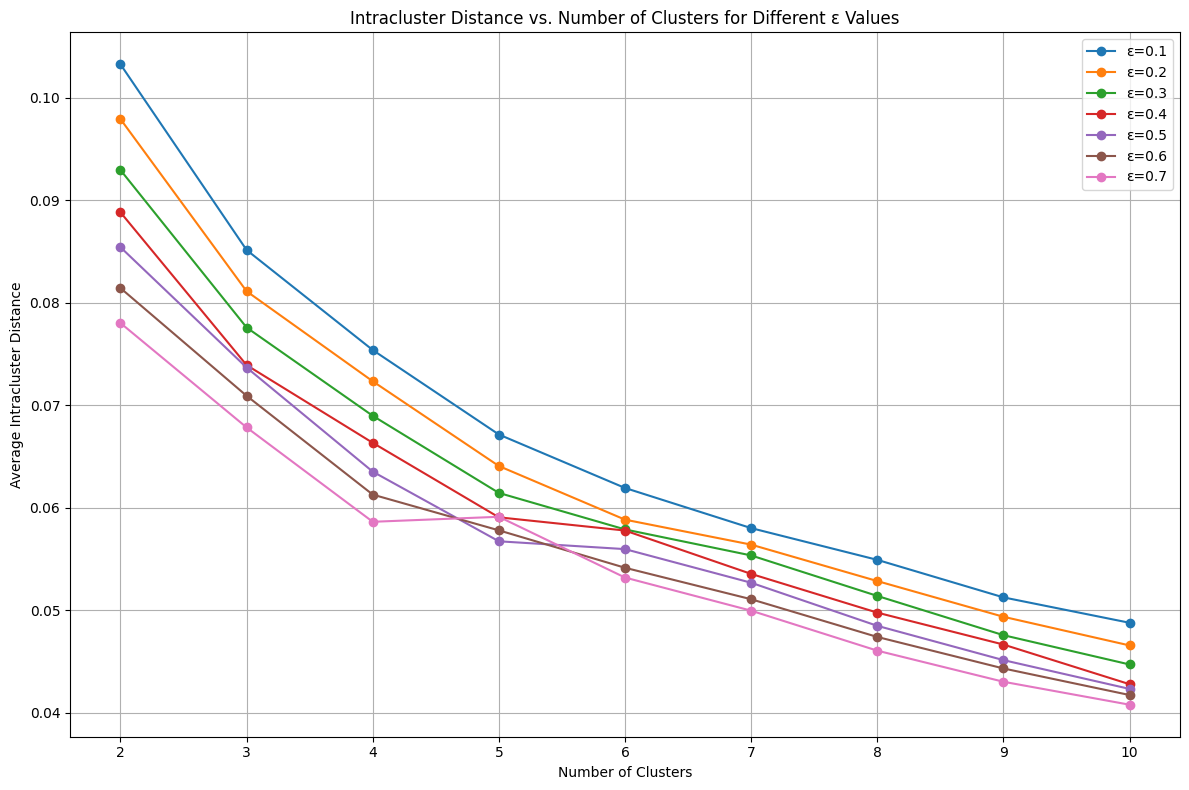

Optimal number of clusters for each epsilon:
epsilon
0.1    10
0.2    10
0.3    10
0.4    10
0.5    10
0.6    10
0.7    10
dtype: int64

Transition Probabilities:
          0         1         2         3
0  0.425000  0.275000  0.100000  0.200000
1  0.220588  0.397059  0.102941  0.279412
2  0.160714  0.160714  0.660714  0.017857
3  0.247191  0.112360  0.044944  0.595506


In [ ]:
epsilon_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
max_clusters = 10
results = analyze_epsilon_sensitivity(correlation_frames, epsilon_range, max_clusters)
plot_epsilon_sensitivity(results)
optimal_clusters = results.groupby('epsilon').apply(lambda x: x.loc[x['distance'].idxmin(), 'n_clusters'])
print("Optimal number of clusters for each epsilon:")
print(optimal_clusters)
print("\nTransition Probabilities:")
print(pd.DataFrame(transition_probabilities))